<a href="https://colab.research.google.com/github/thanawat150/GeoAI/blob/main/Material/Day%202/Excercise/ANN/ANNLandcover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# English: Import the gdown library, which is used to download files from Google Drive.
# Thai: นำเข้าไลบรารี gdown ซึ่งใช้สำหรับดาวน์โหลดไฟล์จาก Google Drive
import gdown

# English: The Google Drive file ID for the file to be downloaded.
# Thai: รหัสไฟล์ Google Drive ของไฟล์ที่ต้องการดาวน์โหลด
# https://drive.google.com/file/d/10x-39P6o6QA9-BVnlnxDVib23rbMlHGL/view?usp=drive_link
file_id = "10x-39P6o6QA9-BVnlnxDVib23rbMlHGL"  # replace with actual file ID

# English: The desired output filename for the downloaded file.
# Thai: ชื่อไฟล์ที่ต้องการสำหรับไฟล์ที่ดาวน์โหลดมา
output = "LCData.zip"

# English: Use gdown to download the file from Google Drive using the file ID and save it with the specified output name.
# Thai: ใช้ gdown เพื่อดาวน์โหลดไฟล์จาก Google Drive โดยใช้รหัสไฟล์และบันทึกด้วยชื่อที่กำหนด
!gdown --id {file_id} -O {output}

# English: Use the unzip command to quietly (q) extract the contents of the downloaded zip file into a new directory named LCData.
# Thai: ใช้คำสั่ง unzip เพื่อแตกไฟล์ zip ที่ดาวน์โหลดมา โดยใช้ตัวเลือก -q เพื่อไม่ให้แสดงผลลัพธ์ระหว่างการแตกไฟล์ และแตกไฟล์ลงในไดเรกทอรีใหม่ชื่อ LCData
!unzip -q {output} -d ./LCData

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=10x-39P6o6QA9-BVnlnxDVib23rbMlHGL

but Gdown can't. Please check connections and permissions.
replace ./LCData/Val/Rural/images_png/2522.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

data Start https://github.com/ashokdahal/GISTDA-Course/tree/master


In [17]:
# English: Use the `unzip` command to quietly extract the contents of the `LCData.zip` file into a new directory named `LCData`.
# Thai: ใช้คำสั่ง `unzip` เพื่อแตกไฟล์ `LCData.zip` โดยไม่แสดงผลลัพธ์ (quietly) และแตกไฟล์ทั้งหมดลงในไดเรกทอรีใหม่ชื่อ `LCData`
!unzip -q LCData.zip -d ./LCData

replace ./LCData/Val/Rural/images_png/2522.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [34]:
# English: Import the 'os' module for interacting with the operating system, like handling file paths.
# Thai: นำเข้าโมดูล 'os' สำหรับการโต้ตอบกับระบบปฏิบัติการ เช่น การจัดการเส้นทางไฟล์
import os

# English: Import the 'numpy' library for numerical operations and array handling.
# Thai: นำเข้าไลบรารี 'numpy' สำหรับการคำนวณเชิงตัวเลขและการจัดการอาเรย์
import numpy as np

# English: Import the 'matplotlib.pyplot' module for plotting and visualization.
# Thai: นำเข้าโมดูล 'matplotlib.pyplot' สำหรับการพล็อตและสร้างภาพข้อมูล
import matplotlib.pyplot as plt

# English: Import the 'imread' function from 'skimage.io' to read images.
# Thai: นำเข้าฟังก์ชัน 'imread' จาก 'skimage.io' เพื่อใช้อ่านภาพ
from skimage.io import imread

# English: Import 'train_test_split' from 'sklearn.model_selection' to split data into training and testing sets.
# Thai: นำเข้า 'train_test_split' จาก 'sklearn.model_selection' เพื่อแบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
from sklearn.model_selection import train_test_split

# English: Import 'StandardScaler' from 'sklearn.preprocessing' for standardizing features.
# Thai: นำเข้า 'StandardScaler' จาก 'sklearn.preprocessing' สำหรับการทำให้ข้อมูลมีมาตรฐาน
from sklearn.preprocessing import StandardScaler

# English: Import 'layers' and 'Sequential' from 'tensorflow.keras' for building neural network models.
# Thai: นำเข้า 'layers' และ 'Sequential' จาก 'tensorflow.keras' สำหรับการสร้างแบบจำลองโครงข่ายประสาทเทียม
from tensorflow.keras import layers, Sequential

# English: Import 'Dense' and 'Dropout' layers from 'tensorflow.keras.layers'.
# Thai: นำเข้าเลเยอร์ 'Dense' และ 'Dropout' จาก 'tensorflow.keras.layers'
from tensorflow.keras.layers import Dense, Dropout

# English: Import 'to_categorical' from 'tensorflow.keras.utils' for one-hot encoding categorical labels.
# Thai: นำเข้า 'to_categorical' จาก 'tensorflow.keras.utils' สำหรับการเข้ารหัสประเภทแบบ One-hot
from tensorflow.keras.utils import to_categorical

# English: Import evaluation metrics from 'sklearn.metrics' including 'classification_report', 'confusion_matrix', and 'accuracy_score'.
# Thai: นำเข้าเมตริกสำหรับการประเมินผลจาก 'sklearn.metrics' ได้แก่ 'classification_report', 'confusion_matrix', และ 'accuracy_score'
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# English: Import 'seaborn' for creating statistical data visualizations.
# Thai: นำเข้า 'seaborn' สำหรับการสร้างภาพข้อมูลทางสถิติ
import seaborn as sns

# English: Import the 'Adam' optimizer from 'tensorflow.keras.optimizers'.
# Thai: นำเข้า Optimizer ที่ชื่อว่า 'Adam' จาก 'tensorflow.keras.optimizers'
from tensorflow.keras.optimizers import Adam

In [35]:
# English: Define the path to the LoveDA validation dataset, specifically the 'Urban' subset.
# Thai: กำหนดเส้นทางไปยังชุดข้อมูล LoveDA สำหรับการตรวจสอบความถูกต้อง (Validation), โดยเฉพาะส่วนย่อย 'Urban'
data_dir = "/content/LCData/Val/Urban"

# English: Create the full path to the directory containing the image files by joining the base directory with 'images_png'.
# Thai: สร้างเส้นทางแบบเต็มไปยังไดเรกทอรีที่มีไฟล์ภาพ โดยการรวมเส้นทางหลักเข้ากับ 'images_png'
image_dir = os.path.join(data_dir, "images_png")

# English: Create the full path to the directory containing the mask files by joining the base directory with 'masks_png'.
# Thai: สร้างเส้นทางแบบเต็มไปยังไดเรกทอรีที่มีไฟล์มาสก์ โดยการรวมเส้นทางหลักเข้ากับ 'masks_png'
mask_dir = os.path.join(data_dir, "masks_png")

# English: Initialize two empty lists, 'X' to store image data and 'y' to store corresponding mask data.
# Thai: สร้างลิสต์ว่างสองอัน คือ 'X' สำหรับเก็บข้อมูลภาพ และ 'y' สำหรับเก็บข้อมูลมาสก์ที่เกี่ยวข้อง
X, y = [], []

In [36]:
# English: Define the number of pixels to sample from each image.
# Thai: กำหนดจำนวนพิกเซลที่จะสุ่มจากแต่ละภาพ
# Thai: เราเลือกสุ่มตัวอย่างพิกเซลจากแต่ละภาพแทนที่จะใช้พิกเซลทั้งหมด เพื่อลดจำนวนข้อมูลในการประมวลผลให้เหมาะสมกับการฝึกโมเดลและประหยัดเวลา
n_samples_per_img = 200

# English: Define an optional limit for the number of images to process to speed up the process.
# Thai: กำหนดจำนวนภาพสูงสุดที่ต้องการประมวลผลเพื่อเพิ่มความเร็วในการทำงาน (เป็นทางเลือก)
# Thai: การจำกัดจำนวนภาพช่วยลดเวลาที่ใช้ในการประมวลผลข้อมูลเริ่มต้น ทำให้เราสามารถทดลองและปรับปรุงโค้ดได้รวดเร็วยิ่งขึ้น
max_images = 900

# English: Initialize a counter to keep track of the number of processed images.
# Thai: กำหนดตัวนับเริ่มต้นเป็น 0 เพื่อนับจำนวนภาพที่ประมวลผลไปแล้ว
# Thai: ตัวแปรนี้ทำหน้าที่เป็นตัวควบคุมให้การวนลูปหยุดทำงานเมื่อประมวลผลถึงจำนวนภาพสูงสุดที่กำหนดไว้
counter = 0

# English: Loop through each file name in the image directory.
# Thai: วนลูปผ่านชื่อไฟล์แต่ละไฟล์ในไดเรกทอรีของภาพ
# Thai: ลูปนี้ใช้เพื่อเข้าถึงภาพแต่ละภาพในไดเรกทอรี เพื่อนำมาประมวลผลทีละไฟล์
for fname in os.listdir(image_dir):
    # English: Skip the file if its name does not end with ".png".
    # Thai: ข้ามไฟล์ที่ไม่ใช่ไฟล์ .png
    # Thai: เป็นการตรวจสอบเพื่อให้แน่ใจว่าเราจะประมวลผลเฉพาะไฟล์ภาพที่มีนามสกุล .png เท่านั้น
    if not fname.endswith(".png"):
        continue

    # English: Read the image file and the corresponding mask file. The image will have a shape of (height, width, 3) for RGB, and the mask will have a shape of (height, width) with class values from 0 to 6.
    # Thai: อ่านไฟล์ภาพและไฟล์มาสก์ที่เกี่ยวข้อง ภาพจะมีขนาด (ความสูง, ความกว้าง, 3) สำหรับ RGB และมาสก์จะมีขนาด (ความสูง, ความกว้าง) โดยมีค่าคลาสตั้งแต่ 0 ถึง 6
    # Thai: เราจำเป็นต้องอ่านทั้งภาพและมาสก์ เพื่อให้ได้ค่าสี (ฟีเจอร์) จากภาพ และป้ายกำกับคลาส (label) จากมาสก์ในตำแหน่งพิกเซลเดียวกัน
    img = imread(os.path.join(image_dir, fname))
    mask = imread(os.path.join(mask_dir, fname))

    # English: Get the height and width of the image.
    # Thai: ดึงค่าความสูงและความกว้างของภาพ
    # Thai: ขนาดของภาพจำเป็นสำหรับการสุ่มพิกเซลภายในขอบเขตที่ถูกต้องของภาพ
    h, w, _ = img.shape

    # English: Generate a list of random x- and y-coordinates to sample pixels from the image.
    # Thai: สร้างรายการพิกัด x และ y แบบสุ่มเพื่อสุ่มตัวอย่างพิกเซลจากภาพ
    # Thai: เราสุ่มเลือกพิกัดของพิกเซลเพื่อลดอคติในการเลือกข้อมูล และทำให้ข้อมูลที่ใช้ฝึกมีความหลากหลายมากขึ้น
    xs = np.random.randint(0, h, n_samples_per_img)
    ys = np.random.randint(0, w, n_samples_per_img)

    # English: Loop through the number of samples per image.
    # Thai: วนลูปตามจำนวนตัวอย่างต่อภาพ
    # Thai: ลูปนี้ใช้เพื่อดึงข้อมูลค่าพิกเซลและป้ายกำกับของพิกเซลแต่ละตัวที่เราสุ่มมา
    for i in range(n_samples_per_img):
        # English: Extract the RGB values and the corresponding class label from the image and mask at the random coordinates.
        # Thai: ดึงค่า RGB และป้ายกำกับคลาสที่เกี่ยวข้องจากภาพและมาสก์ที่พิกัดแบบสุ่ม
        # Thai: คำสั่งนี้เข้าถึงค่าพิกเซล RGB และค่ามาสก์ที่เป็นตัวเลขในตำแหน่งที่สุ่มมา
        r, g, b = img[xs[i], ys[i]]
        label = mask[xs[i], ys[i]]

        # English: Append the RGB pixel values and the class label to the lists X and y, respectively.
        # Thai: เพิ่มค่าพิกเซล RGB และป้ายกำกับคลาสเข้าไปในลิสต์ X และ y ตามลำดับ
        # Thai: เราเก็บค่าพิกเซลไว้ในลิสต์ X (ฟีเจอร์) และค่าป้ายกำกับไว้ในลิสต์ y (ป้ายกำกับเป้าหมาย) เพื่อนำไปใช้ในการสร้างชุดข้อมูลสำหรับการฝึกโมเดลต่อไป
        X.append([r, g, b])
        y.append(label)

    # English: Increment the counter for the number of processed images.
    # Thai: เพิ่มค่าตัวนับสำหรับจำนวนภาพที่ประมวลผลแล้ว
    # Thai: การเพิ่มค่าตัวนับทำให้เราสามารถตรวจสอบได้ว่าได้ประมวลผลภาพไปแล้วกี่ภาพ
    counter += 1

    # English: If the counter reaches the maximum image limit, break the loop.
    # Thai: ถ้าตัวนับถึงจำนวนภาพสูงสุดที่กำหนดไว้ ให้หยุดการวนลูป
    # Thai: เมื่อเงื่อนไขนี้เป็นจริง ลูปจะหยุดทำงานเพื่อป้องกันการประมวลผลภาพมากเกินความจำเป็นตามที่ max_images กำหนด
    if counter >= max_images:
        break

# English: Convert the lists X and y to NumPy arrays for easier manipulation.
# Thai: แปลงลิสต์ X และ y ให้เป็น NumPy array เพื่อให้จัดการได้ง่ายขึ้น
# Thai: NumPy array มีประสิทธิภาพสูงกว่าลิสต์ปกติในการประมวลผลเชิงตัวเลขและเป็นรูปแบบข้อมูลที่ไลบรารีอย่าง TensorFlow หรือ scikit-learn สามารถใช้งานได้โดยตรง
X = np.array(X)
y = np.array(y)

# English: Print the shape of the feature matrix X.
# Thai: พิมพ์ขนาดของเมทริกซ์ฟีเจอร์ X
# Thai: การตรวจสอบรูปร่างของข้อมูลช่วยยืนยันว่าข้อมูลที่เราสร้างขึ้นมีขนาดที่ถูกต้องตามที่เราคาดหวังไว้
print("Feature matrix shape:", X.shape)

# English: Print the number of unique classes and their counts in the 'y' array.
# Thai: พิมพ์จำนวนคลาสที่ไม่ซ้ำกันและจำนวนการปรากฏของแต่ละคลาสในอาเรย์ 'y'
# Thai: การตรวจสอบนี้ช่วยให้เราเห็นภาพรวมของการกระจายข้อมูลในแต่ละคลาส ซึ่งเป็นสิ่งสำคัญในการวางแผนขั้นตอนการปรับสมดุลข้อมูลในภายหลัง
print("Number of unique classes:", np.unique(y, return_counts=True))

Feature matrix shape: (135400, 3)
Number of unique classes: (array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8), array([ 5247, 33609, 16272, 10062, 15379,  7133, 14142, 33556]))


In [37]:
# English: Initialize two empty lists, 'X_bal' and 'y_bal', to store the balanced sample of data.
# Thai: สร้างลิสต์เปล่าสองอัน คือ 'X_bal' และ 'y_bal' เพื่อเก็บข้อมูลตัวอย่างที่สมดุลแล้ว
# Thai: เราสร้างลิสต์เปล่าขึ้นมาเพื่อใช้เป็นที่เก็บข้อมูลชั่วคราวสำหรับแต่ละคลาสก่อนที่จะนำมารวมกันในขั้นตอนสุดท้าย
X_bal, y_bal = [], []

# English: Determine the maximum class label in the original data.
# Thai: ค้นหาป้ายกำกับคลาสที่มีค่าสูงสุดในข้อมูลดั้งเดิม
# Thai: num_classes ถูกกำหนดให้เป็นจำนวนคลาสทั้งหมดในข้อมูล ซึ่งจะนำไปใช้ในการวนลูปเพื่อให้ครอบคลุมการสุ่มข้อมูลจากทุก ๆ คลาส
num_classes = np.max(y)

# English: Loop through each class from 0 up to the maximum class number.
# Thai: วนลูปผ่านแต่ละคลาส ตั้งแต่ 0 ไปจนถึงหมายเลขคลาสสูงสุด
# Thai: การวนลูปนี้ช่วยให้เราสามารถจัดการข้อมูลแต่ละคลาสแยกกัน ทำให้แน่ใจว่าแต่ละคลาสจะได้รับการสุ่มตัวอย่างอย่างเป็นระบบ
for cls in range(num_classes):
    # English: Find the indices of all data points belonging to the current class.
    # Thai: ค้นหาดัชนีของจุดข้อมูลทั้งหมดที่เป็นของคลาสปัจจุบัน
    # Thai: np.where(y == cls)[0] ทำหน้าที่ค้นหาตำแหน่ง (index) ของพิกเซลทั้งหมดที่อยู่ในคลาสนั้น ๆ เพื่อใช้ในการเลือกสุ่มตัวอย่างในภายหลัง
    idx_cls = np.where(y == cls)[0]

    # English: Determine the number of samples to take for the current class, which is either the total number of data points in that class or a maximum of 5000, whichever is smaller.
    # Thai: กำหนดจำนวนตัวอย่างที่จะเลือกจากคลาสปัจจุบัน โดยใช้ค่าที่น้อยที่สุดระหว่างจำนวนข้อมูลทั้งหมดในคลาสนั้นกับจำนวนสูงสุดที่กำหนดไว้ที่ 5000 พิกเซล
    # Thai: การใช้ min(len(idx_cls), 5000) มีจุดประสงค์เพื่อจำกัดจำนวนตัวอย่างสูงสุดไว้ที่ 5000 พิกเซลต่อคลาส ซึ่งเป็นการสร้างความสมดุลให้กับข้อมูล หากบางคลาสมีจำนวนตัวอย่างน้อยกว่า 5000 ก็จะใช้จำนวนทั้งหมดที่มีอยู่
    n = min(len(idx_cls), 5000)

    # English: Randomly select 'n' indices from the current class without replacement.
    # Thai: สุ่มเลือกดัชนีจำนวน 'n' ตัวจากคลาสปัจจุบันโดยไม่มีการเลือกซ้ำ
    # Thai: การสุ่มเลือกดัชนีนี้ช่วยให้เราได้ข้อมูลที่หลากหลายจากคลาสนั้น ๆ โดยการกำหนด replace=False เพื่อป้องกันไม่ให้สุ่มเลือกพิกเซลเดิมซ้ำ
    sampled_idx = np.random.choice(idx_cls, n, replace=False)

    # English: Append the randomly sampled data points from the feature matrix 'X' to 'X_bal'.
    # Thai: เพิ่มจุดข้อมูลที่สุ่มมาแบบสุ่มจากเมทริกซ์ฟีเจอร์ 'X' ไปยัง 'X_bal'
    # Thai: โค้ดนี้ใช้ดัชนีที่สุ่มได้เพื่อดึงข้อมูลพิกเซลที่เกี่ยวข้องจากเมทริกซ์ฟีเจอร์ X และนำไปเก็บไว้ในลิสต์ X_bal
    X_bal.append(X[sampled_idx])

    # English: Append the corresponding class labels to 'y_bal'.
    # Thai: เพิ่มป้ายกำกับคลาสที่สอดคล้องกันไปยัง 'y_bal'
    # Thai: โค้ดนี้ดึงป้ายกำกับคลาสของพิกเซลที่สุ่มได้จากลิสต์ y และนำไปเก็บไว้ในลิสต์ y_bal
    y_bal.append(y[sampled_idx])

# English: Vertically stack the arrays in 'X_bal' to form a single NumPy array.
# Thai: รวมอาเรย์ใน 'X_bal' เข้าด้วยกันในแนวตั้งเพื่อสร้างเป็น NumPy array เดียว
# Thai: np.vstack จะรวมอาเรย์ย่อย ๆ ที่เก็บข้อมูลฟีเจอร์ของแต่ละคลาสเข้าด้วยกันในแนวตั้ง เพื่อสร้างเป็นเมทริกซ์ข้อมูลขนาดใหญ่เพียงเมทริกซ์เดียวที่พร้อมสำหรับการฝึกโมเดล
X_bal = np.vstack(X_bal)

# English: Horizontally stack the arrays in 'y_bal' to form a single NumPy array.
# Thai: รวมอาเรย์ใน 'y_bal' เข้าด้วยกันในแนวนอนเพื่อสร้างเป็น NumPy array เดียว
# Thai: np.hstack ทำหน้าที่คล้ายกับ vstack แต่จะรวมอาเรย์ป้ายกำกับคลาสในแนวนอนเพื่อให้กลายเป็นเวกเตอร์ป้ายกำกับเดียวที่สอดคล้องกับเมทริกซ์ข้อมูล X_bal
y_bal = np.hstack(y_bal)

In [38]:
# English: Get the shape of the 'y_bal' array.
# Thai: แสดงขนาด (shape) ของอาเรย์ 'y_bal'
y_bal.shape

(35000,)

In [39]:
# English: Split the balanced data (X_bal, y_bal) into a training set and a temporary set.
#          30% of the data is allocated to the temporary set.
#          'random_state=42' ensures reproducibility, and 'stratify=y_bal' maintains the same class distribution in both sets.
# Thai: แบ่งข้อมูลที่สมดุลแล้ว (X_bal, y_bal) ออกเป็นชุดฝึก (training set) และชุดชั่วคราว (temporary set)
#       โดย 30% ของข้อมูลจะถูกจัดสรรให้กับชุดชั่วคราว
#       'random_state=42' ทำให้ผลลัพธ์สามารถทำซ้ำได้ และ 'stratify=y_bal' ช่วยให้การกระจายของคลาสในแต่ละชุดยังคงเท่ากัน
X_train, X_temp, y_train, y_temp = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal)

# English: Split the temporary set (X_temp, y_temp) into a validation set and a test set.
#          Each is allocated 50% of the temporary set's data, which is 15% of the original data.
#          'stratify=y_temp' ensures the class distribution is maintained.
# Thai: แบ่งชุดชั่วคราว (X_temp, y_temp) ออกเป็นชุดตรวจสอบ (validation set) และชุดทดสอบ (test set)
#       โดยแต่ละชุดจะได้รับข้อมูล 50% จากชุดชั่วคราว ซึ่งคิดเป็น 15% ของข้อมูลทั้งหมด
#       'stratify=y_temp' ช่วยให้การกระจายของคลาสยังคงเดิม
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [40]:
# English: Get the shape of the 'y_test' array.
# Thai: แสดงขนาด (shape) ของอาเรย์ 'y_test'
y_test.shape

(5250,)

In [41]:
# English: Create an instance of the StandardScaler. This scaler will standardize features by removing the mean and scaling to unit variance.
# Thai: สร้างอินสแตนซ์ของ StandardScaler ซึ่งจะทำการปรับมาตรฐานข้อมูลโดยการลบค่าเฉลี่ยและปรับขนาดให้อยู่ในหน่วยความแปรปรวน
# Thai: StandardScaler จะช่วยให้ข้อมูลมีค่าเฉลี่ยเป็น 0 และค่าเบี่ยงเบนมาตรฐานเป็น 1 ซึ่งจะช่วยให้การฝึกโมเดลมีประสิทธิภาพมากขึ้นและป้องกันไม่ให้นิวรอนบางตัวทำงานหนักกว่านิวรอนตัวอื่น
scaler = StandardScaler()

# English: Fit the scaler to the training data (X_train) and then transform it. This step learns the mean and standard deviation from the training data and applies the transformation.
# Thai: ฝึก (fit) ตัว scaler ด้วยข้อมูลชุดฝึก (X_train) และทำการแปลงข้อมูลชุดนั้นด้วย นี่คือขั้นตอนที่ตัว scaler จะเรียนรู้ค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานจากข้อมูลชุดฝึกเพื่อนำมาใช้ในการแปลงข้อมูล
X_train = scaler.fit_transform(X_train)

# English: Transform the validation data (X_val) using the mean and standard deviation learned from the training data. It's crucial not to fit the scaler to the validation data to avoid data leakage.
# Thai: แปลงข้อมูลชุดตรวจสอบ (X_val) โดยใช้ค่าเฉลี่ยและค่าเบี่ยงเบนมาตรฐานที่เรียนรู้มาจากข้อมูลชุดฝึก สิ่งสำคัญคือห้ามฝึก (fit) ตัว scaler ด้วยข้อมูลชุดตรวจสอบเพื่อป้องกันการรั่วไหลของข้อมูล
# Thai: การใช้ .transform() แทน .fit_transform() สำหรับข้อมูลชุดตรวจสอบและชุดทดสอบ เป็นสิ่งสำคัญอย่างยิ่งเพื่อป้องกัน Data Leakage (การรั่วไหลของข้อมูล) ซึ่งจะทำให้โมเดลได้เรียนรู้ข้อมูลของชุดทดสอบล่วงหน้าและทำให้ผลการประเมินดูดีเกินจริง
X_val = scaler.transform(X_val)

# English: Transform the test data (X_test) using the same parameters learned from the training data.
# Thai: แปลงข้อมูลชุดทดสอบ (X_test) โดยใช้พารามิเตอร์เดียวกันกับที่เรียนรู้มาจากข้อมูลชุดฝึก
X_test = scaler.transform(X_test)

# English: Get the number of unique classes from the original labels.
# Thai: หาจำนวนคลาสที่ไม่ซ้ำกันจากป้ายกำกับเดิม
# Thai: จำนวนคลาสนี้จำเป็นสำหรับการกำหนดจำนวนนิวรอนในเลเยอร์เอาท์พุตของโมเดล
num_classes = len(np.unique(y))

# English: Convert the integer class labels of the training set to a one-hot encoded format.
# Thai: แปลงป้ายกำกับคลาสที่เป็นจำนวนเต็มของชุดฝึกให้อยู่ในรูปแบบ One-hot encoding
# Thai: One-hot encoding เป็นรูปแบบที่ใช้แทนป้ายกำกับที่เป็นตัวเลขด้วยเวกเตอร์ไบนารี ซึ่งจะช่วยให้โมเดลสามารถเข้าใจและทำนายคลาสได้อย่างถูกต้อง โดยเฉพาะเมื่อใช้ loss function แบบ categorical_crossentropy
y_train = to_categorical(y_train, num_classes)

# English: Convert the integer class labels of the validation set to a one-hot encoded format.
# Thai: แปลงป้ายกำกับคลาสที่เป็นจำนวนเต็มของชุดตรวจสอบให้อยู่ในรูปแบบ One-hot encoding
y_val = to_categorical(y_val, num_classes)

# English: Convert the integer class labels of the test set to a one-hot encoded format.
# Thai: แปลงป้ายกำกับคลาสที่เป็นจำนวนเต็มของชุดทดสอบให้อยู่ในรูปแบบ One-hot encoding
y_test = to_categorical(y_test, num_classes)


In [42]:
# English: Create a Sequential model and name it "DeepANN".
# Thai: สร้างโมเดลแบบ Sequential และตั้งชื่อว่า "DeepANN"
# Thai: Sequential เป็นโครงสร้างโมเดลที่เรียบง่ายที่สุด โดยจะเรียงลำดับเลเยอร์ต่าง ๆ ต่อกันเป็นชั้น ๆ จากบนลงล่าง เหมาะสำหรับการสร้างโมเดลที่ไม่มีการแยกสาขา
model = Sequential(name="DeepANN")

# English: Build the hidden layers of the network in a loop.
# Thai: สร้างเลเยอร์ที่ซ่อน (hidden layers) ของเครือข่ายด้วยการวนลูป
# Thai: การใช้ for-loop ช่วยให้สร้างเลเยอร์หลาย ๆ ชั้นได้อย่างอัตโนมัติ ทำให้โค้ดสั้นลงและง่ายต่อการปรับเปลี่ยนจำนวนเลเยอร์ในอนาคต
for i in range(6):
    # English: Add a Dense layer with 64 units and a ReLU activation function.
    # Thai: เพิ่มเลเยอร์แบบ Dense ที่มี 64 นิวรอน และใช้ฟังก์ชัน activation แบบ ReLU
    # Thai: Dense เป็นเลเยอร์ที่เชื่อมต่อกับนิวรอนทุกตัวในเลเยอร์ก่อนหน้า units=64 คือจำนวนนิวรอนในเลเยอร์นี้ ส่วน activation="relu" เป็นฟังก์ชันที่ช่วยให้โมเดลสามารถเรียนรู้ความสัมพันธ์ที่ไม่เป็นเชิงเส้นของข้อมูลได้
    model.add(layers.Dense(
        units=64,
        activation="relu",
        name=f"Layer_{i}",
        # English: The first layer needs the input shape, which is the number of features (3 for RGB).
        # Thai: เลเยอร์แรกต้องการกำหนดรูปร่างของข้อมูลนำเข้า ซึ่งคือจำนวนฟีเจอร์ (3 สำหรับ RGB)
        input_shape=(3,) if i == 0 else ()
    ))
    # English: Add a Dropout layer with a rate of 0.3 to prevent overfitting.
    # Thai: เพิ่มเลเยอร์ Dropout ที่มีอัตราส่วน 0.3 เพื่อป้องกันการเกิด Overfitting
    # Thai: Dropout เป็นเทคนิคที่ช่วยลดการเกิด Overfitting โดยจะสุ่มปิดนิวรอนบางส่วนในระหว่างการฝึก ทำให้โมเดลไม่พึ่งพานิวรอนใดนิวรอนหนึ่งมากเกินไป
    model.add(layers.Dropout(0.3, name=f"Drop_{i}"))

# English: Add the final output layer.
# Thai: เพิ่มเลเยอร์เอาท์พุตสุดท้าย
# Thai: เลเยอร์นี้ทำหน้าที่ให้ผลลัพธ์การคาดคะเน units=num_classes คือจำนวนนิวรอนเท่ากับจำนวนคลาสทั้งหมดที่เราต้องการทำนาย
model.add(layers.Dense(
    units=num_classes,
    activation="softmax",
    name="Output"
))

# English: Create an Adam optimizer with a fixed learning rate of 0.001.
# Thai: สร้าง Adam optimizer ที่มีอัตราการเรียนรู้ (learning rate) คงที่เท่ากับ 0.001
# Thai: Adam คือ Optimizer ที่ทำหน้าที่ปรับค่าน้ำหนักของโมเดลให้มีประสิทธิภาพสูงสุดระหว่างการฝึก โดย learning_rate จะกำหนดขนาดของการปรับน้ำหนักในแต่ละรอบ
optimizer = Adam(learning_rate=1e-3)

# English: Compile the model, specifying the optimizer, the loss function ('categorical_crossentropy' for one-hot encoded labels), and the metric ('accuracy').
# Thai: Compile โมเดล โดยระบุ Optimizer, ฟังก์ชัน Loss ('categorical_crossentropy' สำหรับป้ายกำกับที่เข้ารหัสแบบ one-hot), และเมตริก ('accuracy')
# Thai: ขั้นตอนนี้เป็นการตั้งค่าโมเดลให้พร้อมสำหรับการฝึก โดยกำหนด Optimizer ที่จะใช้, Loss Function ที่ใช้ในการคำนวณความผิดพลาด, และ Metrics ที่ใช้ในการวัดประสิทธิภาพของโมเดล
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

# English: Print a summary of the model's architecture.
# Thai: พิมพ์สรุปโครงสร้างของโมเดล
# Thai: model.summary() จะแสดงรายละเอียดของโมเดลทั้งหมด รวมถึงชื่อเลเยอร์ รูปร่างของเอาท์พุต และจำนวนพารามิเตอร์ที่ต้องใช้ในการฝึก
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "DeepANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Layer_0 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_0 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_1 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_2 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_3 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_4 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Layer_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_5 (Dropout)                │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,576 (84.28 KB)

 Trainable params: 21,576 (84.28 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# English: Train the model using the training data and evaluate it on the validation data.
# Thai: ฝึกฝนโมเดลโดยใช้ข้อมูลชุดฝึก และประเมินผลด้วยข้อมูลชุดตรวจสอบ
history = model.fit(
    # English: The training input data.
    # Thai: X_train คือข้อมูลนำเข้าสำหรับชุดฝึก
    X_train,
    # English: The training target labels.
    # Thai: y_train คือป้ายกำกับเป้าหมายสำหรับชุดฝึก
    y_train,
    # English: Provide the validation data to monitor the model's performance on unseen data during training. This helps in detecting overfitting.
    # Thai: validation_data=(X_val, y_val) คือข้อมูลชุดตรวจสอบที่ใช้ในการเฝ้าติดตามประสิทธิภาพของโมเดลจากข้อมูลที่ไม่เคยเห็นในระหว่างการฝึก ซึ่งช่วยในการตรวจจับภาวะ overfitting (การเรียนรู้ข้อมูลชุดฝึกมากเกินไป)
    validation_data=(X_val, y_val),
    # English: The number of epochs, which is the number of times the model will iterate over the entire training dataset.
    # Thai: epochs=50 คือจำนวนรอบที่โมเดลจะทำการฝึกซ้ำข้อมูลชุดฝึกทั้งหมด โดยแต่ละ epoch โมเดลจะปรับน้ำหนัก (weights) เพื่อลดค่าความผิดพลาด
    epochs=50,
    # English: The batch size, or the number of samples per gradient update. A larger batch size can speed up training but may require more memory.
    # Thai: batch_size=256 คือจำนวนตัวอย่างที่จะนำมาประมวลผลพร้อมกันในแต่ละครั้งก่อนที่จะทำการอัปเดตน้ำหนักของโมเดล การใช้ batch_size ช่วยให้การฝึกมีประสิทธิภาพมากขึ้นและใช้หน่วยความจำน้อยลง
    batch_size=256,
    # English: Set verbose to 1 to display a progress bar, showing the training progress and metrics for each epoch.
    # Thai: verbose=1 คือการกำหนดให้แสดงผลการฝึก โดยจะแสดงแถบความคืบหน้าและค่าเมตริก เช่น loss และ accuracy ของทั้งชุดฝึกและชุดตรวจสอบในแต่ละรอบ (epoch)
    verbose=1
)

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.2096 - loss: 1.9213 - val_accuracy: 0.4276 - val_loss: 1.4331
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3936 - loss: 1.4536 - val_accuracy: 0.4690 - val_loss: 1.2981
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4332 - loss: 1.3535 - val_accuracy: 0.4914 - val_loss: 1.2643
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4701 - loss: 1.3144 - val_accuracy: 0.5352 - val_loss: 1.2193
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5020 - loss: 1.2882 - val_accuracy: 0.5305 - val_loss: 1.2145
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5164 - loss: 1.2614 - val_accuracy: 0.5425 - val_loss: 1.2053
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5238 - loss: 1.2581 - val_accuracy: 0.5442 - val_loss: 1.2058
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5263 - loss: 1.2523 - val_accuracy: 0.5451 - val_

In [44]:

# English: Evaluate the model's performance on the test data.
# Thai: ประเมินประสิทธิภาพของโมเดลด้วยข้อมูลชุดทดสอบ
# Thai: ขั้นตอนนี้จะวัดว่าโมเดลที่ผ่านการฝึกมาแล้วมีความแม่นยำแค่ไหนเมื่อเจอกับข้อมูลที่ไม่เคยเห็นมาก่อน (test set) ซึ่งเป็นตัวชี้วัดที่แท้จริงของประสิทธิภาพโมเดล
loss, acc = model.evaluate(X_test, y_test)

# English: Print the test accuracy formatted to three decimal places.
# Thai: พิมพ์ค่าความแม่นยำ (accuracy) จากชุดทดสอบ โดยจัดรูปแบบให้แสดงทศนิยม 3 ตำแหน่ง
# Thai: การแสดงค่าความแม่นยำเป็นเปอร์เซ็นต์หรือค่าทศนิยมจะช่วยให้เข้าใจผลการประเมินได้ง่าย และการจำกัดทศนิยมช่วยให้อ่านค่าได้กระชับขึ้น
print(f"Test Accuracy: {acc:.3f}")

165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5558 - loss: 1.1616
Test Accuracy: 0.556


Pixel-wise Accuracy: 0.5556190476190476

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       750
           1       0.23      0.02      0.04       750
           2       0.61      0.17      0.27       750
           3       0.42      0.61      0.50       750
           4       0.46      0.70      0.56       750
           5       0.50      0.62      0.55       750
           6       0.54      0.77      0.64       750

    accuracy                           0.56      5250
   macro avg       0.54      0.56      0.51      5250
weighted avg       0.54      0.56      0.51      5250


Confusion Matrix:
 [[750   0   0   0   0   0   0]
 [  0  16  38 174 172 141 209]
 [  0  12 131 249 134 156  68]
 [  0   7  15 457 102 111  58]
 [  0  11   3  67 525  47  97]
 [  0  12  23 141  57 463  54]
 [  0  11   6   4 140  14 575]]


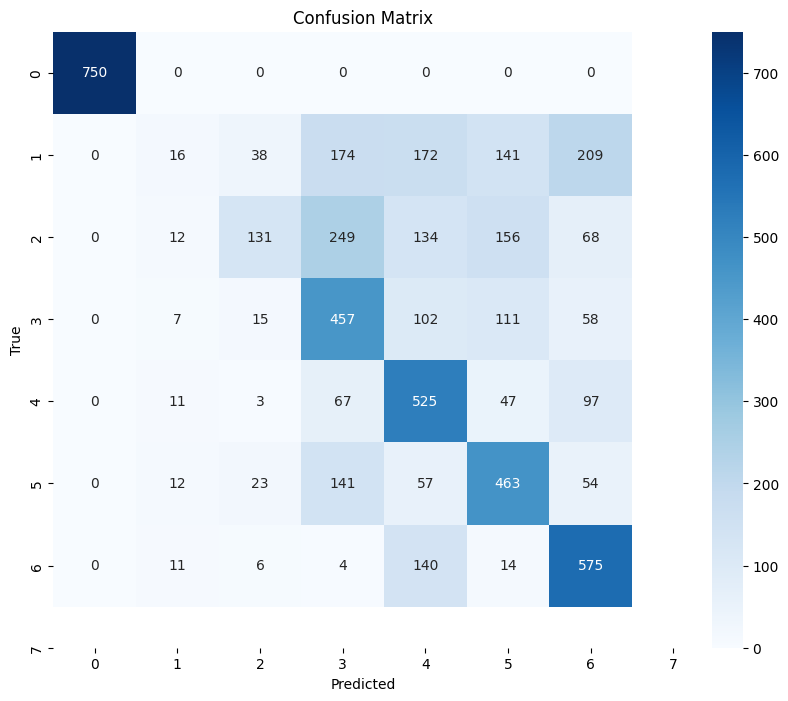

In [45]:
# English: Convert test labels back from one-hot encoding to integer labels.
# Thai: แปลงป้ายกำกับชุดทดสอบ (y_test) จากรูปแบบ one-hot กลับเป็นป้ายกำกับตัวเลข
# Thai: การแปลงนี้จำเป็นเพื่อให้สามารถนำไปเปรียบเทียบกับผลการทำนายของโมเดลได้ เนื่องจากเมตริกการประเมินผล เช่น accuracy_score และ classification_report ต้องการป้ายกำกับในรูปแบบตัวเลข
y_test_labels = np.argmax(y_test, axis=1)

# English: Predict the class probabilities for the test data.
# Thai: ทำนายค่าความน่าจะเป็นของแต่ละคลาสสำหรับข้อมูลชุดทดสอบ
# Thai: model.predict จะให้ผลลัพธ์เป็นค่าความน่าจะเป็นของแต่ละคลาสสำหรับแต่ละพิกเซลในชุดทดสอบ
y_pred_probs = model.predict(X_test, verbose=0)

# English: Convert the predicted probabilities to the final predicted class indices.
# Thai: แปลงค่าความน่าจะเป็นที่ทำนายได้ให้เป็นดัชนีคลาสที่ทำนาย
# Thai: np.argmax จะเลือกดัชนีที่มีค่าความน่าจะเป็นสูงสุดในแต่ละแถว ซึ่งเท่ากับเป็นการเลือกคลาสที่มีโอกาสถูกต้องมากที่สุด
y_pred = np.argmax(y_pred_probs, axis=1)

# English: Print evaluation metrics.
# Thai: พิมพ์ค่าเมตริกการประเมินผล
# Thai: ส่วนนี้จะแสดงผลลัพธ์ความแม่นยำ, รายงานการจำแนกประเภท (classification report), และเมทริกซ์ความสับสน (confusion matrix) เพื่อให้เห็นภาพรวมของประสิทธิภาพโมเดลอย่างละเอียด
print("Pixel-wise Accuracy:", accuracy_score(y_test_labels, y_pred))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred))

# English: Create a confusion matrix heatmap.
# Thai: สร้างแผนที่ความร้อนของเมทริกซ์ความสับสน
# Thai: แผนภาพนี้จะช่วยให้เห็นภาพว่าโมเดลสับสนระหว่างคลาสใดบ้าง โดยค่าในแต่ละช่องจะแสดงจำนวนพิกเซลที่ถูกทำนายและจำแนกได้ถูกต้องหรือผิดพลาด
cm = confusion_matrix(y_test_labels, y_pred)

# English: Set the figure size for the plot.
# Thai: กำหนดขนาดของรูปภาพสำหรับแสดงผล
# Thai: การกำหนดขนาดช่วยให้แผนภาพที่แสดงผลออกมามีขนาดพอเหมาะและอ่านง่าย
plt.figure(figsize=(10,8))

# English: Plot the confusion matrix as a heatmap using Seaborn.
# Thai: พล็อตเมทริกซ์ความสับสนเป็นแผนที่ความร้อนโดยใช้ Seaborn
# Thai: sns.heatmap จะแปลงเมทริกซ์ความสับสนให้เป็นแผนภาพสีที่อ่านง่าย โดย `annot=True` จะแสดงตัวเลขในแต่ละช่อง, `fmt="d"` จัดรูปแบบตัวเลขเป็นจำนวนเต็ม และ `cmap="Blues"` ใช้โทนสีฟ้า
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(num_classes), yticklabels=range(num_classes))
# English: Set the title and labels for the plot.
# Thai: ตั้งชื่อและป้ายกำกับแกนสำหรับรูปภาพ
# Thai: การตั้งชื่อและป้ายกำกับที่ชัดเจนช่วยให้ผู้ใช้งานเข้าใจความหมายของแผนภาพได้ทันที
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# English: Display the plot.
# Thai: แสดงผลรูปภาพ
# Thai: คำสั่งนี้จะแสดงแผนที่ความร้อนที่สร้างขึ้นมา
plt.show()

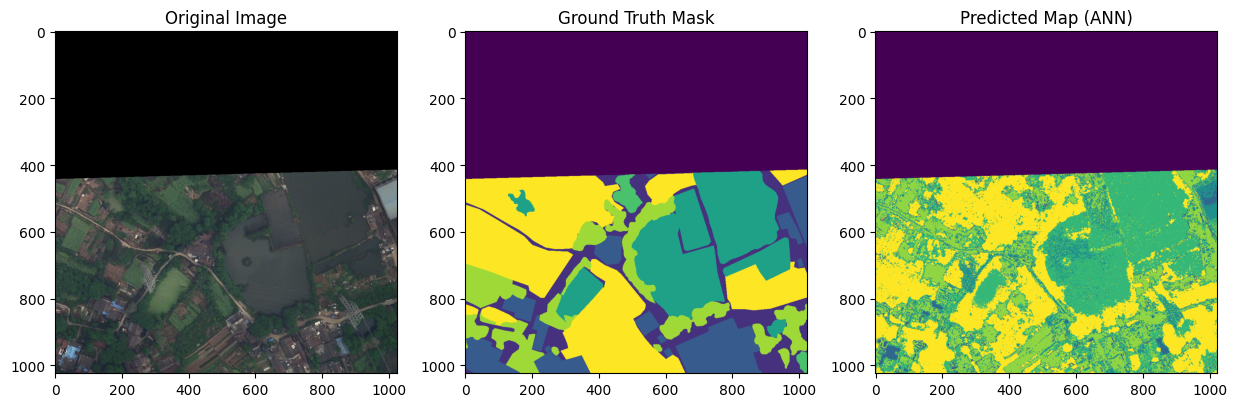

In [49]:
# English: Pick one image from the validation set for visualization.
# Thai: เลือกภาพหนึ่งภาพจากชุดตรวจสอบเพื่อนำมาแสดงผล
# Thai: การเลือกภาพมาหนึ่งภาพจากชุดข้อมูลที่ไม่เคยถูกโมเดลใช้ในการฝึก จะช่วยให้เราสามารถประเมินผลการทำนายของโมเดลได้ด้วยสายตา
sample_file = os.listdir(image_dir)[60]  # take the first one

# English: Read the selected image and its corresponding mask.
# Thai: อ่านภาพที่เลือกและมาสก์ที่เกี่ยวข้อง
# Thai: โค้ดส่วนนี้ทำหน้าที่โหลดภาพต้นฉบับและภาพมาสก์ที่เป็นป้ายกำกับที่ถูกต้อง เพื่อใช้ในการเปรียบเทียบกับผลลัพธ์การทำนายของโมเดล
img = imread(os.path.join(image_dir, sample_file))
mask = imread(os.path.join(mask_dir, sample_file))

# English: Get the dimensions (Height, Width, Channels) of the image.
# Thai: ดึงขนาดของภาพ (ความสูง, ความกว้าง, จำนวนช่องสี)
# Thai: การดึงขนาดของภาพเป็นสิ่งจำเป็นเพื่อใช้ในการปรับรูปร่างของข้อมูลให้ถูกต้องทั้งก่อนและหลังการทำนาย
H, W, C = img.shape

# English: Preprocess the image pixels by reshaping and scaling them.
# Thai: ประมวลผลพิกเซลของภาพเบื้องต้นโดยการปรับรูปร่างและปรับค่ามาตรฐาน
# Thai: การปรับรูปร่าง (-1, C) จะแปลงภาพให้เป็นรายการของพิกเซลแต่ละตัว (เช่น Nx3 สำหรับ RGB) จากนั้นจึงใช้ scaler ที่ฝึกไว้แล้วกับชุดฝึกเพื่อปรับค่าให้เป็นมาตรฐานเดียวกับข้อมูลที่ใช้ฝึกโมเดล
img_scaled = scaler.transform(img.reshape(-1, C))

# English: Predict the class for each pixel.
# Thai: ทำนายคลาสสำหรับแต่ละพิกเซล
# Thai: model.predict จะนำเข้าข้อมูลพิกเซลที่ถูกปรับมาตรฐานแล้ว และส่งออกเป็นค่าความน่าจะเป็นของแต่ละคลาสสำหรับทุกพิกเซล
preds = model.predict(img_scaled, verbose=0)

# English: Convert the predicted probabilities into a class map and reshape it back to the original image dimensions.
# Thai: แปลงค่าความน่าจะเป็นที่ทำนายได้ให้เป็นแผนที่คลาส และปรับรูปร่างกลับไปเป็นขนาดเดิมของภาพ
# Thai: np.argmax จะเลือกคลาสที่มีความน่าจะเป็นสูงสุดสำหรับแต่ละพิกเซล และ reshape(H, W) จะจัดเรียงพิกเซลเหล่านั้นกลับไปเป็นโครงสร้างภาพ 2 มิติเหมือนเดิม
pred_map = np.argmax(preds, axis=1).reshape(H, W)

# English: Plot the original image, ground truth mask, and the predicted map side by side.
# Thai: พล็อตภาพต้นฉบับ มาสก์ที่ถูกต้อง และแผนที่ที่ทำนายได้เคียงข้างกัน
# Thai: การพล็อตทั้งสามภาพพร้อมกันช่วยให้สามารถเปรียบเทียบผลลัพธ์ของโมเดลกับความจริงได้ทันที ทำให้เห็นว่าโมเดลทำนายได้ดีแค่ไหนในแต่ละพื้นที่ของภาพ
plt.figure(figsize=(15,5))

# English: Plot the original image in the first subplot.
# Thai: พล็อตภาพต้นฉบับในช่องย่อยแรก
# Thai: แสดงภาพต้นฉบับที่ยังไม่ถูกประมวลผล เพื่อให้ผู้ใช้งานเห็นภาพข้อมูลจริง
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")

# English: Plot the ground truth mask in the second subplot.
# Thai: พล็อตมาสก์ที่ถูกต้องในช่องย่อยที่สอง
# Thai: แสดงมาสก์ที่เป็นคำตอบที่ถูกต้อง เพื่อใช้เป็นข้อมูลอ้างอิงในการตรวจสอบผลการทำนาย
plt.subplot(1,3,2)
plt.imshow(mask, )
plt.title("Ground Truth Mask")

# English: Plot the predicted class map in the third subplot.
# Thai: พล็อตแผนที่คลาสที่ทำนายได้ในช่องย่อยที่สาม
# Thai: แสดงผลการทำนายของโมเดล เพื่อให้เราเห็นว่าแต่ละพิกเซลในภาพถูกจำแนกเป็นคลาสใด
plt.subplot(1,3,3)
plt.imshow(pred_map,)
plt.title("Predicted Map (ANN)")

# English: Display the final plot.
# Thai: แสดงผลรูปภาพทั้งหมด
# Thai: คำสั่งนี้จะแสดงหน้าต่างที่มีรูปภาพทั้งสามภาพที่เราพล็อตไว้ก่อนหน้า
plt.show()


หาข้อมูล https://github.com/Junjue-Wang/LoveDA
